In [45]:
import csv

import re
f = open('cleaned_users_tweets.csv','r')
r1 = csv.reader(f)
alltweets = []
for row in r1:
    if(len(row)!=0):
        t=row[0]
        alltweets.append(re.sub(r'x[0-9a-fA-F]+|RT',r'', t))

In [46]:
f1 = open('cleaned_bots_tweets.csv','r')
r2 = csv.reader(f1)
alltweetsb = []
for row in r2:
    if(len(row)!=0):
        t=row[0]
        alltweetsb.append(re.sub(r'x[0-9a-fA-F]+|RT',r'', t))

In [47]:
botdes=[]
for i in range(0,len(alltweets)):
    botdes.append(0)
for i in range(0,len(alltweetsb)):
    botdes.append(1)

In [48]:

data_tweets= alltweets+alltweetsb

In [49]:
c=zip(data_tweets,botdes)
c=list(c)

In [50]:
data = data_tweets
target = botdes

In [51]:
#!/usr/bin/env python -W ignore::DeprecationWarning
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(data)
Y =target
classifier1 = MultinomialNB()
classifier2 = BernoulliNB()
print("MULTINOMIALNB")
scores1 = cross_val_score(classifier1, X, Y, cv=10, scoring='accuracy')
print("accuracy = ",scores1.mean())
scores1 = cross_val_score(classifier1, X, Y, cv=10, scoring='precision')
print("precision = ",scores1.mean())
scores1 = cross_val_score(classifier1, X, Y, cv=10, scoring='recall')
print("recall = ",scores1.mean())
scores1 = cross_val_score(classifier1, X, Y, cv=10, scoring='f1')
print("f1 = ",scores1.mean())
scores1 = cross_val_score(classifier1, X, Y, cv=10, scoring='roc_auc')
print("AUC = ",scores1.mean())
print("BERNOULLINB")
scores2 = cross_val_score(classifier2, X, Y, cv=10, scoring='accuracy')
print("accuracy = ",scores2.mean())
scores2 = cross_val_score(classifier2, X, Y, cv=10, scoring='precision')
print("precision = ",scores2.mean())
scores2 = cross_val_score(classifier2, X, Y, cv=10, scoring='recall')
print("recall = ",scores2.mean())
scores2 = cross_val_score(classifier2, X, Y, cv=10, scoring='f1')
print("f1 = ",scores2.mean())
scores2 = cross_val_score(classifier2, X, Y, cv=10, scoring='roc_auc')
print("AUC = ",scores2.mean())

MULTINOMIALNB
accuracy =  0.712897655601
precision =  0.834462431015
recall =  0.643549818788
f1 =  0.723023984155
AUC =  0.813904623703
BERNOULLINB
accuracy =  0.722752481633
precision =  0.815924440531
recall =  0.687885442116
f1 =  0.743607622916
AUC =  0.814566560657


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

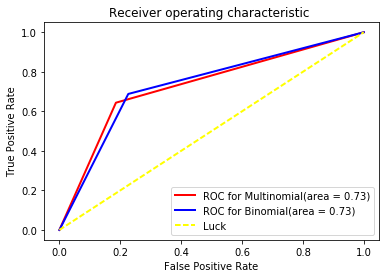

In [53]:
from sklearn.model_selection import cross_val_predict

lw=2

probas = cross_val_predict(classifier1, X, Y, cv=10);
# Compute ROC curve and area the curve for MNB
fpr, tpr, thresholds = roc_curve(Y, probas)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=lw, color="red",
             label='ROC for Multinomial(area = %0.2f)' % ( roc_auc))
probas = cross_val_predict(classifier2, X, Y, cv=10);
# Compute ROC curve and area the curve for BNB
fpr, tpr, thresholds = roc_curve(Y, probas)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=lw, color="blue",
             label='ROC for Binomial(area = %0.2f)' % ( roc_auc))

 
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='yellow',
         label='Luck')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()